### ORC with code

ORC is one key point that we want to extract text from pdf or iamge, as there will be next step to do transformation like information extraction, pattern recognition etc. We would like to get better result from ROC output. Image processing withont deep learning will really be a difficult task, as computer just stere the image as pixel as numbers, without any point. So we could try to use deep learning to train models to get pattern, that we could extract these text from original image. Currently the most popular solution is based on google open-source project [Tesseract](https://tesseract-ocr.github.io/tessdoc/Home.html#40-with-lstm) that is based on LSTM neural network to extract image. 

First step is to install Tesseract, for detail step to install it has written in README.md.

After we have install it, then we need to write some code to do image extraction with hands-dirty.

In [2]:
import numpy as np
from PIL import Image
import pytesseract
import matplotlib.pyplot as plt


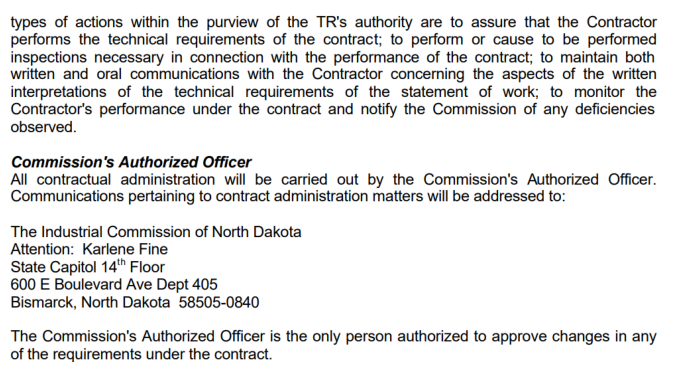

In [67]:
# first to read image
file_name = 'one_page.png'

image = Image.open(file_name)

# first let's show what image we have
fig = plt.figure(figsize=(12, 8))
plt.imshow(image)
plt.axis("off")

plt.show()

In [20]:
# convert image into array
image_arr = np.array(image)
image_shape = image_arr.shape

print("Image shape: ", image_shape)
print("There are {} pixels in this image.".format(image_shape[0]*image_shape[1]*image_shape[2]))

Image shape:  (536, 1011, 4)
There are 2167584 pixels in this image.


[[  8  45 109 255]
 [ 94 175 240 255]
 [160 238 255 255]
 [183 248 255 255]
 [176 247 255 255]]


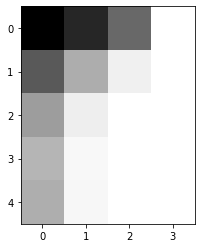

In [29]:
# take some sample pixels from image 
# noted: 0 means black, 255 means white
sample_image = image_arr[100:105,200, :]
print(sample_image)

plt.imshow(sample_image, cmap=plt.get_cmap('gray'))
plt.show()

In [30]:
# after we have get some insight of our picture, let's try to use pre-trained neural networt to extract text from image
image_output = pytesseract.image_to_string(image)

# it does takes time, as we have 2 millions pixels to process
print(image_output)

types of actions within the purview of the TR's authority are to assure that the Contractor
performs the technical requirements of the contract; to perform or cause to be performed
inspections necessary in connection with the performance of the contract; to maintain both
written and oral communications with the Contractor concerning the aspects of the written
interpretations of the technical requirements of the statement of work; to monitor the
Contractor's performance under the contract and notify the Commission of any deficiencies
observed.

Commission's Authorized Officer
All contractual administration will be carried out by the Commission's Authorized Officer.
Communications pertaining to contract administration matters will be addressed to:

The Industrial Commission of North Dakota
Attention: Karlene Fine

State Capitol 14'" Floor

600 E Boulevard Ave Dept 405

Bismarck, North Dakota 58505-0840

The Commission's Authorized Officer is the only person authorized to approve changes 

In [46]:
# before we do anything, let's first try to get what language is supported
import os

tess_data_path = "/srv/conda/envs/notebook/share/tessdata"

lang_list = [x.replace(".traineddata", '') for x in os.listdir(tess_data_path) if x.lower() != 'copying' and not x.lower().startswith("readme")]
print("There are `{}` languages are supported".format(len(lang_list)))
print(sorted(lang_list))

There are `128` languages are supported
['afr', 'amh', 'ara', 'asm', 'aze', 'aze_cyrl', 'bel', 'ben', 'bod', 'bos', 'bre', 'bul', 'cat', 'ceb', 'ces', 'chi_sim', 'chi_sim_vert', 'chi_tra', 'chi_tra_vert', 'chr', 'configs', 'cos', 'cym', 'dan', 'deu', 'div', 'dzo', 'ell', 'eng', 'enm', 'epo', 'est', 'eus', 'fao', 'fas', 'fil', 'fin', 'fra', 'frk', 'frm', 'fry', 'gla', 'gle', 'glg', 'grc', 'guj', 'hat', 'heb', 'hin', 'hrv', 'hun', 'hye', 'iku', 'ind', 'isl', 'ita', 'ita_old', 'jav', 'jpn', 'jpn_vert', 'kan', 'kat', 'kat_old', 'kaz', 'khm', 'kir', 'kmr', 'kor', 'kor_vert', 'lao', 'lat', 'lav', 'lit', 'ltz', 'mal', 'mar', 'mkd', 'mlt', 'mon', 'mri', 'msa', 'mya', 'nep', 'nld', 'nor', 'oci', 'ori', 'osd', 'pan', 'pdf.ttf', 'pol', 'por', 'pus', 'que', 'ron', 'rus', 'san', 'script', 'sin', 'slk', 'slv', 'snd', 'spa', 'spa_old', 'sqi', 'srp', 'srp_latn', 'sun', 'swa', 'swe', 'syr', 'tam', 'tat', 'tel', 'tessconfigs', 'tgk', 'tha', 'tir', 'ton', 'tur', 'uig', 'ukr', 'urd', 'uzb', 'uzb_cyrl', 'v

In [36]:
# in fact we could even try to configure the language of our image
# but if we do need to configure language, then we have to 
print(pytesseract.image_to_string(image, lang='eng'))

types of actions within the purview of the TR's authority are to assure that the Contractor
performs the technical requirements of the contract; to perform or cause to be performed
inspections necessary in connection with the performance of the contract; to maintain both
written and oral communications with the Contractor concerning the aspects of the written
interpretations of the technical requirements of the statement of work; to monitor the
Contractor's performance under the contract and notify the Commission of any deficiencies
observed.

Commission's Authorized Officer
All contractual administration will be carried out by the Commission's Authorized Officer.
Communications pertaining to contract administration matters will be addressed to:

The Industrial Commission of North Dakota
Attention: Karlene Fine

State Capitol 14'" Floor

600 E Boulevard Ave Dept 405

Bismarck, North Dakota 58505-0840

The Commission's Authorized Officer is the only person authorized to approve changes 

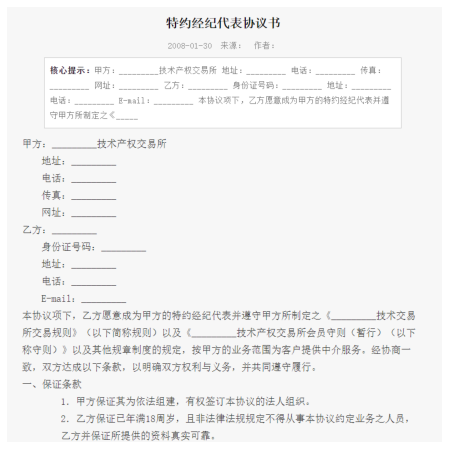

In [68]:
# let's try with chinese version of contract image
ch_image = Image.open("ch_contract_one_page.png")

fig = plt.figure(figsize=(12, 8))
plt.imshow(ch_image)
plt.axis("off")

plt.show()

In [62]:
# let's try to extract it from image
ch_image_out = pytesseract.image_to_string(ch_image, lang="chi_sim")

# split lines
ch_image_out = ch_image_out.split("\n")

# remove black lines
ch_image_out =[x for x in ch_image_out if x != "" and x != " "]

print('\n'.join(ch_image_out))

特约经纪代表协议书
2008-01-30 来源: 作者:
   
__ 身份证号码      地址    四
议项下，乙方愿意成为甲方的特约经纪代表并遵
甲方: ”技术产权交易所
地址:
电话:
传真:
网址:
乙方:
身份证号码:
地址:
电话:
E-mail:
本协议项下，乙方愿意成为甲方的特约经纪代表并遵守甲方所制定之《       技术交易
所交易规则》《以下简称规则》以及《       技术产权交易所会员守则〈和暂行) 〈以下
称守则》》以及其他规章制度的规定，按甲方的业务范围为客户提供中介服务。经协商一
致，双方达成以下条款，以明确双方权利与义务，并共同遵守履行。
一、保证条款
1.，甲方保证其为依法组建，有权签订本协议的法人组织。
2， 乙方保证已年满18周岁，且非法律法规规定不得从事本协议约定业务之人员，
乙方并保证所提供的资料真实可靠-



#### Pain point

I have tried with some of chinese version of contract that it doesn't seems that it has good support for it, just like above part that haven't extraxct some text of that contract.

Regarding to English version contract, it does do well, but regarding to Chinese, it do need better performance.

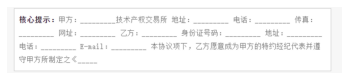

In [65]:
# show not good part
not_good_image = Image.open("not_good.png")
plt.imshow(not_good_image)
plt.axis("off")
plt.show()

#### PDF without image solution

If we just have some contract in PDF format but without image in the PDF, then we could try to read PDF files content with some PDF solution. **Noted**, if there is any image in the PDF, then will be ignored.

In [4]:
import PyPDF2

pdf_file_name = "one_page_sample_contract.pdf"

file = open(pdf_file_name, 'rb')

file_reader = PyPDF2.PdfFileReader(file)

print("There are {} pages".format(file_reader.numPages))

print("File content: ")

out_pdf2 = file_reader.getPage(0).extractText().split("\n")
print('\n'.join(out_pdf2))

There are 1 pages
File content: 
Contract __________ Page 3  types of actions within the purview of the TR's authority are to assure that the Contractor performs the technical requirements of the contract; to perform or cause to be performed inspections necessary in connection with the performance of the contract; to maintain both written and oral communications with the Contractor concerning the aspects of the written interpretations of the technical requirements of the statement of work; to monitor the Contractor's performance under the contract and notify the Commission of any deficiencies 
observed.  Commission's Authorized Officer All contractual administration will be carried out by the Commission's Authorized Officer.  Communications pertaining to contract administration matters will be addressed to:  The Industrial Commission of North Dakota Attention:  Karlene Fine State Capitol 14th Floor 600 E Boulevard Ave Dept 405 Bismarck, North Dakota  58505-0840  The Commission's Author

In [5]:
# let's try with textract
# so with textract that it mark each line of text as a separate one, not as same line.
import textract

text = textract.process(pdf_file_name)

out_textract = text.decode('utf-8').split("\n")
out_textract = [x for x in out_textract if x != '' and x != ' ' ]

print("\n".join(out_textract))

Contract __________ 
Page 3 
types  of  actions  within  the  purview  of  the  TR's  authority  are  to  assure  that  the  Contractor 
performs  the  technical  requirements  of  the  contract;  to  perform  or  cause  to  be  performed 
inspections  necessary  in  connection  with  the  performance  of  the  contract;  to  maintain  both 
written  and  oral  communications  with  the  Contractor  concerning  the  aspects  of  the  written 
interpretations  of  the  technical  requirements  of  the  statement  of  work;  to  monitor  the 
Contractor's  performance  under  the  contract  and  notify  the  Commission  of  any  deficiencies 
observed. 
Commission's Authorized Officer 
All  contractual  administration  will  be  carried  out  by  the  Commission's  Authorized  Officer.  
Communications pertaining to contract administration matters will be addressed to: 
The Industrial Commission of North Dakota 
Attention:  Karlene Fine 
State Capitol 14th Floor 
600 E Boulevard Ave Dept

In [6]:
# let's try with a chinese version of contract
# so for sample file that don't have other format, then we do could get the file content as we want.
ch_pdf_file_name = 'sample_ch_contract.pdf'

text = textract.process(ch_pdf_file_name)

out_textract = text.decode('utf-8').split("\n")
out_textract = [x for x in out_textract if x != '' and x != ' ' ]

print("\n".join(out_textract))

    为寻求合作发展，合作各方经充分协商，一致同意共同出资设立 A 有限公司（以下简称“本公
司”），各方依据《中华人民共和国公司法》等有关法律法规，签订如下协议，作为各方发起行为
的规范，以资共同遵守。 
    第一条 公司概况 
    申请设立的有限责任公司名称拟定为“A 有限公司”（以下简称公司），并有不同字号的备选
名称若干，公司名称以公司登记机关核准的为准。 
    公司住所拟设在__大连___市___高新___区___10__路___33__号___2___楼（房）。 
    本公司的组织形式为：有限责任公司。 
    责任承担：甲、乙、丙方以各自的出资额为限对新公司承担责任，新公司以其全部资产对新公
司的债务承担责任。 
    第二条 公司宗旨与经营范围 
    本公司的经营宗旨为：_机器学习__。 
    本公司的经营范围为：主营__机器学习__，兼营__python___。 
    第三条 注册资本 
    本公司的注册资本为人民币___10__元整，出资为___货币__（货币、实物、工业产权、非专利
技术、土地使用权等）形式，其中： 
    甲方：出资额为___2_____元，以____货币_____方式出资，占注册资本的_____20____％； 
    乙方：出资额为___5____元，以_____货币____方式出资，占注册资本的_____50____％； 
    丙方：出资额为___3____元，以____货币_____方式出资，占注册资本的____30_____％。 
    全体股东的货币出资金额不得低于有限责任公司注册资本的百分之三十。 
    第四条 出资时间 
    股东应当按期足额缴纳公司章程中规定的各自所认缴的出资额。股东以货币出资的，应当将货
币出资足额存入有限责任公司在银行开设的账户；以非货币财产出资的，应当依法办理其财产权的
转移手续。 
    股东不按照前款规定缴纳出资的，除应当向公司足额缴纳外，还应当向已按期足额缴纳出资的
股东承担违约责任。 
    甲方投入新公司的土地使用权应于____2000___年____1_____月_____1____日前办理完毕过户
手续； 
    乙方投入新公司的现金应于____2000_____年____2_____月_____2____日前将

#### Transformation sample

In fact after we have extract text from PDF or image, then the next step will do some transformation, this will be the hardest one, as there are many other cases that we should consider and will try to come out a solution for this.

Let's take above file as an example, that we want to know what the company is doing and how much it will take to construct.

In [14]:
# as this example will contain a special character: `_`, so just take this as an example

# first cleaning
out_clearning = [x for x in out_textract if '_' in x]

out_clearning = [s.strip() for s in out_clearning]

# split
out_clearning = [x.split("_") for x in out_clearning]
out_clearning = [[x for x in out if x != ''] for out in out_clearning]

# make it back into string
out_clearning = [''.join(out) for out in out_clearning]

# after we have already process it, then we will need a pattern to get what we want.
out_clearning

['公司住所拟设在大连市高新区10路33号2楼（房）。',
 '本公司的经营宗旨为：机器学习。',
 '本公司的经营范围为：主营机器学习，兼营python。',
 '本公司的注册资本为人民币10元整，出资为货币（货币、实物、工业产权、非专利',
 '甲方：出资额为2元，以货币方式出资，占注册资本的20％；',
 '乙方：出资额为5元，以货币方式出资，占注册资本的50％；',
 '丙方：出资额为3元，以货币方式出资，占注册资本的30％。',
 '甲方投入新公司的土地使用权应于2000年1月1日前办理完毕过户',
 '乙方投入新公司的现金应于2000年2月2日前将货币出资足额存',
 '丙方投入新公司的现金应于2000年1月1日前办理完毕']

In [22]:
# we need to get some patterns
scope_key = '经营范围'
scope = [x for x in out_clearning if scope_key in x and '：' in x]

scope_out = [x.split("：") for x in scope][0]

# get main 
main_key = "主营"

scope_out =  [x for x in scope_out if main_key in x][0]

main_scope = scope_out.split("，")[0]

print("Get main scope is: `{}`".format(main_scope))

Get main scope is: `主营机器学习`


This is really a basic implement for looking for some pattern that we want, as there are tons of kinds of scenarios, so this does need lots of idea should come out to solve this.